<a href="https://colab.research.google.com/github/pauloalexx/Python_study/blob/main/Bibliotecas_Python_V2_Numpy%2C_Pandas_e_Matplot_Exerc%C3%ADcio_Aula_147.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A utilização dos dados para analisar a estrutura do RH e os perfis dos colaboradores de uma empresa é algo essencial nos dias atuais com o advendo da tecnologia. Traçar um perfil ou entender como é o quadro de funcionários se tornou algo muito mais fácil com a utilização de ferramentas como excel, power bi e python. Neste contexto, você utilizando o dataset [Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set), e o glossário de todos as variáveis está disponível no [Codebook](https://rpubs.com/rhuebner/hrd_cb_v14), você deve responder as 10 perguntas para praticar os conceitos adquiridos nas aulas sobre bibliotecas e para aprender funções ou conceitos novos.
- 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?
- 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).
- 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)
- 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)
- 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)
- 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?
- 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)
- 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?
- 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position
- 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?


## Import e seleção dos dados

In [ ]:
#-- Importação de bibliotecas e dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#-- Import via colab
# from google.colab import files
# files.upload()
# df = pd.read_csv('/content/HRDataset_v14.csv')

dataset = pd.read_csv('/content/HRDataset_v14.csv')


FileNotFoundError: ignored

## 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?

In [ ]:
dataset.drop_duplicates('Employee_Name')
len(np.unique(dataset['Employee_Name'])) # contanto valores unicos com numpy
len(dataset['Employee_Name'].unique()) # contanto valores unicos com pandas

311

## 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).

In [ ]:
from unicodedata import normalize
dataset.State.value_counts(normalize=True)*100 # função para contar valores com pandas.

# .State -> nome da coluna a ser contada
# .value_counts -> função de contagem
# (normalize=True) -> função para colocar em %


MA    88.745981
CT     1.929260
TX     0.964630
VT     0.643087
UT     0.321543
AZ     0.321543
ND     0.321543
OR     0.321543
MT     0.321543
NV     0.321543
ID     0.321543
KY     0.321543
NC     0.321543
FL     0.321543
GA     0.321543
CO     0.321543
NY     0.321543
PA     0.321543
RI     0.321543
NH     0.321543
TN     0.321543
IN     0.321543
OH     0.321543
CA     0.321543
WA     0.321543
AL     0.321543
VA     0.321543
ME     0.321543
Name: State, dtype: float64

## 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)

In [ ]:
dataset.head()

NameError: ignored

<BarContainer object of 3 artists>

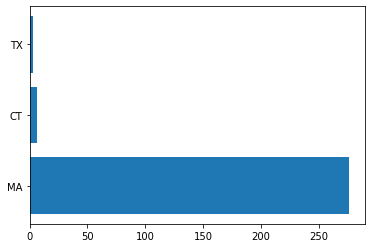

In [ ]:
# Matplot
index = dataset.State.value_counts().index # função para contar valores - Return a Series containing counts of unique values
valor = dataset.State.value_counts().values # função para contar valores - Return a Series containing counts of unique values.

plt.barh(index[:3],valor[:3]) #função para criar gráfico de barra

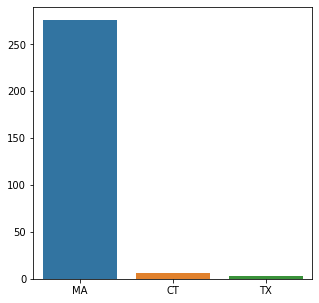

In [ ]:
# Seaborn

graf = plt.figure(figsize=(5,5))
sns.barplot(y=valor[:3], x=index[:3])

In [ ]:
# Plotly
grafploty = px.bar(x=index[:3],y=valor[:3])
grafploty.show()

<Figure size 360x360 with 0 Axes>

## 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)

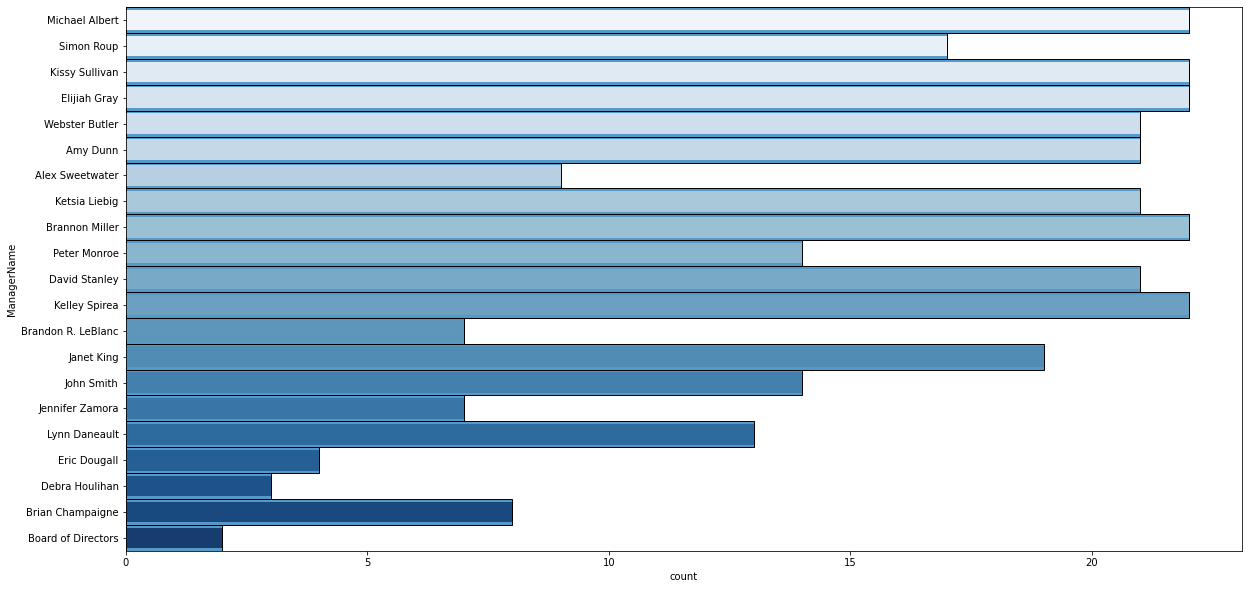

In [ ]:
plt.figure(figsize=(20,10))

sns.histplot(data=dataset,y='ManagerName', palette="Blues") # Histograma
sns.countplot(data=dataset,y='ManagerName',palette='Blues') # Histograma

## 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)

In [ ]:
df_hired = dataset[pd.isnull(dataset['DateofTermination'])]
# df_hired recebe o bd somente com dados em branco na coluna 'DateofTermination'
# sintaxe da função é 1º BD_Total[2ºpd.função(3ºBD[Coluna])]
df_hired
df_hired.keys()

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

## 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?

In [ ]:
df_hired['TotalAmount'] = df_hired['Salary']*(2022 - df_hired['year'])*(1-0.05)

KeyError: ignored

## 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)

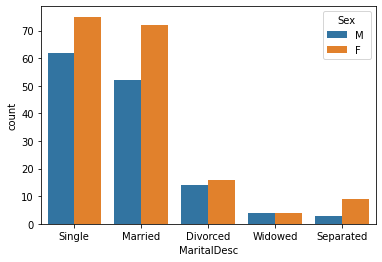

In [ ]:
sns.countplot(data=dataset,x='MaritalDesc',hue='Sex')

In [ ]:
px.histogram(dataset,x='MaritalDesc',color='Sex')

## 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?

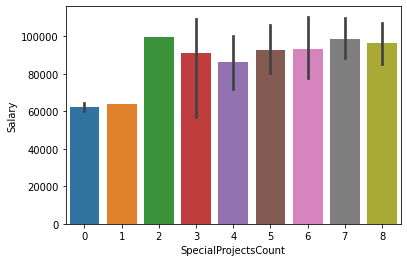

In [ ]:
sns.barplot(data=dataset,x='SpecialProjectsCount',y='Salary')

## 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position

In [ ]:
# .agg realiza funções matemáticas de acordo com um dicionário de condição

dataset.groupby('Department', as_index = False).agg({'Salary':'mean'})

,Department,Salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


In [ ]:
dataset.groupby('RaceDesc', as_index = False).agg({'Salary':'mean'})

,RaceDesc,Salary
0,American Indian or Alaska Native,65806.000000
1,Asian,68521.206897
2,Black or African American,74431.025000
3,Hispanic,83667.000000
4,Two or more races,59998.181818
5,White,67287.545455


In [ ]:
dataset.groupby('Position', as_index = False).agg({'Salary':'mean'})

,Position,Salary
0,Accountant I,63507.666667
1,Administrative Assistant,52280.000000
2,Area Sales Manager,64932.555556
3,BI Developer,95465.000000
4,BI Director,110929.000000
5,CIO,220450.000000
6,Data Analyst,89932.571429
7,Data Analyst,88527.000000
8,Data Architect,150290.000000
9,Database Administrator,108499.600000


## 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?

In [ ]:
dataset.info()

# Total de colunas, linhas (no dataframe)
# Quais são as colunas (Features)
# Qual o tipo dos dados
# Quantos dados nulos e não nulos
# Tamanho (memória) do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non